In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import glob
import argparse


In [2]:
np.set_printoptions(suppress=True)

# Prepare object points

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# (8,6) is for the given testing images.
# If you use the another data (e.g. pictures you take by your smartphone), 
# you need to set the corresponding numbers.
corner_x = 8
corner_y = 7
objp = np.zeros((corner_x*corner_y,3), np.float32)
objp[:,:2] = np.mgrid[0:corner_x, 0:corner_y].T.reshape(-1,2)
block_len = 2.5
objp = objp * block_len

# Depth camera calibration

Start finding chessboard corners of depth image...
find the chessboard corners of depth_chessboard_data\01.png
find the chessboard corners of depth_chessboard_data\02.png
find the chessboard corners of depth_chessboard_data\04.png


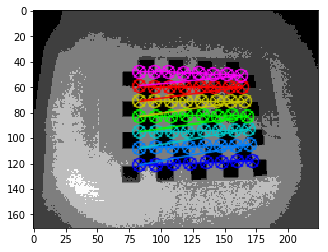

In [4]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.


img_size = (10, 10)

# Make a list of calibration images
images = glob.glob('depth_chessboard_data/*.png')

# Step through the list and search for chessboard corners
print('Start finding chessboard corners of depth image...')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    img_size = (img.shape[1], img.shape[0])

    #Find the chessboard corners
    print('find the chessboard corners of',fname)
    ret, corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
#         print(fname)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (corner_x,corner_y), corners, ret)
        plt.imshow(img)
    else:
        print(fname)

In [5]:
print('Depth Camera calibration by recorded IR image...')
img_size = (img.shape[1], img.shape[0])
# You need to comment these functions and write your calibration function from scratch.
# Notice that rvecs is rotation vector, not the rotation matrix, and tvecs is translation vector.
# In practice, you'll derive extrinsics matrixes directly. The shape must be [pts_num,3,4], and use them to plot.
print(len(objpoints), len(imgpoints))
print(img_size)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
Vr = np.array(rvecs)
Tr = np.array(tvecs)
extrinsics = np.concatenate((Vr, Tr), axis=1).reshape(-1,6)
print(mtx)
print(extrinsics)
print(Tr) # chessboard寬度 2.5

Depth Camera calibration by recorded IR image...
3 3
(224, 171)
[[197.24352041   0.         114.28692524]
 [  0.         197.87540793  92.69790379]
 [  0.           0.           1.        ]]
[[-0.27609264  0.53929342  3.07782661 10.02500212  8.5809912  39.67628262]
 [ 0.39454959 -0.5507045  -3.0427699   6.23240812  9.88269089 40.39654764]
 [-0.22505006  0.46617978  3.0651007  11.55377587  5.03555628 39.0137854 ]]
[[[10.02500212]
  [ 8.5809912 ]
  [39.67628262]]

 [[ 6.23240812]
  [ 9.88269089]
  [40.39654764]]

 [[11.55377587]
  [ 5.03555628]
  [39.0137854 ]]]


# RGB camrea calibration

Start finding chessboard corners of RGB image...
find the chessboard corners of camera_chessboard_data\01.png
find the chessboard corners of camera_chessboard_data\02.png
find the chessboard corners of camera_chessboard_data\04.png


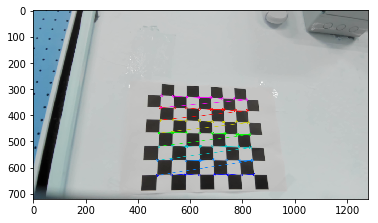

In [6]:
RGBobjpoints = []
RGBimgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_chessboard_data/*.png')

# Step through the list and search for chessboard corners
print('Start finding chessboard corners of RGB image...')
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    img_size = (img.shape[1], img.shape[0])

    #Find the chessboard corners
    print('find the chessboard corners of',fname)
    ret, corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)
#     print(len(corners))

    # If found, add object points, image points
    if ret == True:
        RGBobjpoints.append(objp)
        RGBimgpoints.append(corners)
#         print(fname)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (corner_x,corner_y), corners, ret)
        plt.imshow(img)
        

In [7]:
print('Camera calibration by recorded RGB image...')
# You need to comment these functions and write your calibration function from scratch.
# Notice that rvecs is rotation vector, not the rotation matrix, and tvecs is translation vector.
# In practice, you'll derive extrinsics matrixes directly. The shape must be [pts_num,3,4], and use them to plot.
print(len(RGBobjpoints), len(RGBimgpoints))
print(img_size)
ret, RGB_mtx, RGB_dist, RGB_rvecs, RGB_tvecs = cv2.calibrateCamera(RGBobjpoints, RGBimgpoints, img_size,None,None)
RGB_Vr = np.array(RGB_rvecs)
RGB_Tr = np.array(RGB_tvecs)
RGB_extrinsics = np.concatenate((RGB_Vr, RGB_Tr), axis=1).reshape(-1,6)
print("RMS",ret)
print(RGB_mtx)
print(RGB_dist)
print(RGB_extrinsics)
print(RGB_Tr)

Camera calibration by recorded RGB image...
3 3
(1280, 720)
RMS 1.7335399268059
[[1080.58029869    0.          719.21738766]
 [   0.         1093.55187485  370.57666117]
 [   0.            0.            1.        ]]
[[ 0.27884955  1.3707983   0.01212153  0.02028929 -9.15227708]]
[[ 0.48695324 -0.65836633 -2.97986043  1.60731258 13.66602257 54.141712  ]
 [ 0.48777518 -0.66363511 -2.98086959  1.63408342 13.64282969 54.09951797]
 [ 0.34506657 -0.65390253 -3.05729098  5.9388497  12.1344453  53.53376201]]
[[[ 1.60731258]
  [13.66602257]
  [54.141712  ]]

 [[ 1.63408342]
  [13.64282969]
  [54.09951797]]

 [[ 5.9388497 ]
  [12.1344453 ]
  [53.53376201]]]


# Get extrinsics matrix by known intrinsics matrix

In [8]:
_depth_mtx = np.mat([
    [211.78734743, 0, 117.65755014],
    [0, 211.60443122, 87.02191618],
    [0, 0, 1. ]])
_depth_dist = np.mat([[-1.79341292e-02 ,-1.88867100e+00, -2.02313569e-04, -4.28223089e-03
   ,3.24046539e+00]])

_R = []
_T = []

for i in range(len(RGBobjpoints)):
    retval, _dept_rvecs, _dept_tvecs = cv2.solvePnP(objpoints[i], imgpoints[i], _depth_mtx, _depth_dist)

    _dept_Vr = np.array(_dept_rvecs)
    _dept_Tr = np.array(_dept_tvecs)
    _R.append(_dept_Vr)
    _T.append(_dept_Tr)
    
    _dept_extrinsics = np.concatenate((_dept_Vr, _dept_Tr), axis=1).reshape(-1,6)
    print(_dept_Tr)
#     print(_dept_extrinsics)
    print()

[[ 9.35104157]
 [ 9.72234091]
 [42.53935529]]

[[ 5.53856793]
 [11.04906238]
 [43.30055647]]

[[10.89369252]
 [ 6.14459076]
 [41.80714377]]



In [9]:
# _RGB_mtx = np.mat([[913.24145912,   0.,         668.9538477  ],
#  [  0.,         905.10342204, 389.24919723],
#  [  0.,           0.,           1.        ]])

# _RGB_dist =  np.mat([[ 0.25755514, -0.92817129,  0.00150453,  0.01340316,  1.17293952]])

_RGB_mtx = np.mat([[941.09129171,   0.,         638.94641198  ],
 [  0.,         939.71879681, 364.60682026],
 [  0.,           0.,           1.        ]])

_RGB_dist =  np.mat([[ 0.32649104, -1.06727582, -0.0025263,  -0.00531191,  1.09671098]])

_RGB_R = []
_RGB_T = []

for i in range(len(RGBobjpoints)):
    retval, _RGB_rvecs, _RGB_tvecs = cv2.solvePnP(RGBobjpoints[i], RGBimgpoints[i], _RGB_mtx, _RGB_dist)

    _RGB_Vr = np.array(_RGB_rvecs)
    _RGB_Tr = np.array(_RGB_tvecs)
    _RGB_R.append(_RGB_Vr)
    _RGB_T.append(_RGB_Tr)
    
    _RGB_extrinsics = np.concatenate((_RGB_Vr, _RGB_Tr), axis=1).reshape(-1,6)
    print(_RGB_Tr)
#     print(_RGB_extrinsics)
    print()

[[ 5.59537809]
 [14.11154696]
 [46.55441173]]

[[ 5.61997184]
 [14.08757904]
 [46.51270906]]

[[ 9.8664701 ]
 [12.59489056]
 [46.06663093]]



# stereoCalibrate

In [10]:
# mtx = np.mat([
#     [211.78734743, 0, 117.65755014],
#     [0, 211.60443122, 87.02191618],
#     [0, 0, 1. ]])
# dist = np.mat([[-1.79341292e-02 ,-1.88867100e+00, -2.02313569e-04, -4.28223089e-03
#    ,3.24046539e+00]])


# RGB_mtx = np.mat([[913.24145912,   0.,         668.9538477  ],
#  [  0.,         905.10342204, 389.24919723],
#  [  0.,           0.,           1.        ]])

# RGB_dist =  np.mat([[ 0.25755514, -0.92817129,  0.00150453,  0.01340316,  1.17293952]])

_objpoints = []
_imgpoints = []
_RGBimgpoints = []

_objpoints.append(objp)
_imgpoints.append(imgpoints[-1])
_RGBimgpoints.append(RGBimgpoints[-1])

print('=== Result ===')
ret, depth_cam_int, depth_cam_dist, RGB_cam_int, RGB_cam_dist, depth_rgb_rmat, depth_rgb_tvec, E, F = cv2.stereoCalibrate(
    _objpoints, _imgpoints, _RGBimgpoints, _depth_mtx, _depth_dist, _RGB_mtx, _RGB_dist, None)

print('  RMS :', ret)
print('  Depth Camera intrinsic parameters :')
print(depth_cam_int, '    ')
print('  Depth Camera distortion parameters :')
print(depth_cam_dist, '    ')
print('  RGB Camera intrinsic parameters :')
print(RGB_cam_int, '    ')
print('  RGB Camera distortion parameters :')
print(RGB_cam_dist, '    ')
print('  Rotation matrix / translation vector from depth camera to RGB camera')
print('  (they translate points from depth camera coord to RGB camera coord) :')
print(depth_rgb_rmat, '    ')
print(depth_rgb_tvec, '    ')
print()
print('Rotation vector')
v,_ = cv2.Rodrigues(depth_rgb_rmat)
print(v)

=== Result ===
  RMS : 1.2493168020909835
  Depth Camera intrinsic parameters :
[[211.78734743   0.         117.65755014]
 [  0.         211.60443122  87.02191618]
 [  0.           0.           1.        ]]     
  Depth Camera distortion parameters :
[[-0.01793413 -1.888671   -0.00020231 -0.00428223  3.24046539]]     
  RGB Camera intrinsic parameters :
[[941.09129171   0.         638.94641198]
 [  0.         939.71879681 364.60682026]
 [  0.           0.           1.        ]]     
  RGB Camera distortion parameters :
[[ 0.32649104 -1.06727582 -0.0025263  -0.00531191  1.09671098]]     
  Rotation matrix / translation vector from depth camera to RGB camera
  (they translate points from depth camera coord to RGB camera coord) :
[[ 0.99929329 -0.03725922  0.00496648]
 [ 0.03672564  0.99593916  0.08219738]
 [-0.00800892 -0.08195689  0.9966037 ]]     
[[-0.99821527]
 [ 2.63873647]
 [ 4.99231523]]     

Rotation vector
[[-0.082189  ]
 [ 0.00649654]
 [ 0.03704285]]


In [11]:
# Result 2027
#   Rotation matrix / translation vector from depth camera to RGB camera
#   (they translate points from depth camera coord to RGB camera coord) :
# [[ 0.99861337 -0.03981607 -0.03443855]
#  [ 0.04133541  0.99814975  0.04459222]
#  [ 0.03259935 -0.04595392  0.9984115 ]]  

# [[-0.83227932]
#  [ 3.02386444]
#  [ 3.16318384]] 

# Rotation vector
# [[-0.04530952]
#  [-0.03354593]
#  [ 0.0406084 ]]


In [12]:
import camera_calibration_show_extrinsics as show

Show the camera extrinsics


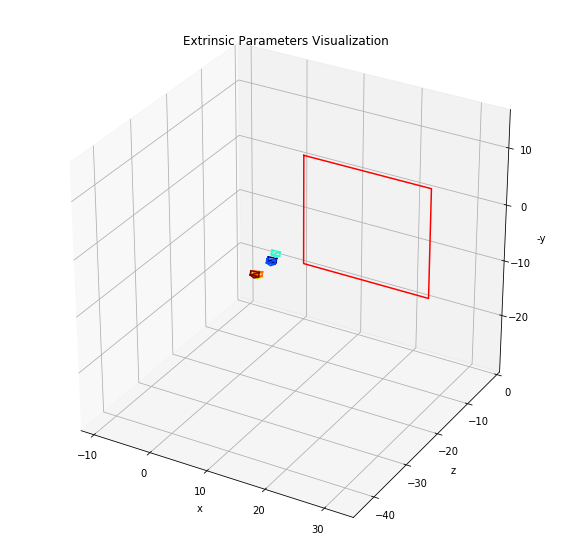

In [13]:
# show the camera extrinsics
print('Show the camera extrinsics')
_Depthcamera_extrinsics = np.concatenate((_R, _T), axis=1).reshape(-1,6)
_RGBcamera_extrinsics = np.concatenate((_RGB_R, _RGB_T), axis=1).reshape(-1,6)
# plot setting
# You can modify it for better visualization
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
# camera setting
camera_matrix = RGB_cam_int
cam_width = 0.064/0.1
cam_height = 0.032/0.1
scale_focal = 1600
# chess board setting
board_width = 9
board_height = 8
square_size = 2.5

Allextrinsics = np.zeros((_Depthcamera_extrinsics.shape[0]+_RGBcamera_extrinsics.shape[0],6))
Allextrinsics[:_Depthcamera_extrinsics.shape[0]] = _Depthcamera_extrinsics
Allextrinsics[_Depthcamera_extrinsics.shape[0]:] = _RGBcamera_extrinsics


# display
# True -> fix board, moving cameras
# False -> fix camera, moving boards
min_values, max_values = show.draw_camera_boards(ax, camera_matrix, cam_width, cam_height,
                                                scale_focal, Allextrinsics, board_width,
                                                board_height, square_size, True)

# _min_values, _max_values = show.draw_camera_boards(ax, RGB_cam_int, cam_width, cam_height,
#                                                 scale_focal, RGB_extrinsics, board_width,
#                                                 board_height, square_size, True)

X_min = min_values[0]
X_max = max_values[0]
Y_min = min_values[1]
Y_max = max_values[1]
Z_min = min_values[2]
Z_max = max_values[2]
max_range = np.array([X_max-X_min, Y_max-Y_min, Z_max-Z_min]).max() / 2.0

mid_x = (X_max+X_min) * 0.5
mid_y = (Y_max+Y_min) * 0.5
mid_z = (Z_max+Z_min) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, 0)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('-y')
ax.set_title('Extrinsic Parameters Visualization')
plt.show()

In [14]:
fs = cv2.FileStorage('calibration_result.xml', cv2.FILE_STORAGE_WRITE)
fs.write('rms', ret)
fs.write('depth_cam_int', depth_cam_int)
fs.write('depth_cam_dist', depth_cam_dist)
fs.write('RGB_cam_int', RGB_cam_int)
fs.write('RGB_cam_dist', RGB_cam_dist)
fs.write('depth_rgb_rmat', depth_rgb_rmat)
fs.write('depth_rgb_tvec', depth_rgb_tvec)
fs.release()

In [15]:
#check

In [16]:
# def calculate_XYZ(u,v, rotationMatrix, translationVector, cameraMatrix):
#     #https://github.com/rodolfoap/OpenCV-2Dto3D/blob/master/transform.cpp                                  
#     #Solve: From Image Pixels, find World Points
#     Z = 0;
# #     rotationMatrix,_ = cv2.Rodrigues(rotationMatrix)
    
#     uv_1 = np.array([[u,v,1]], dtype=np.float32)
#     uv_1 = uv_1.T
    
#     invM_x_uv1 = np.matmul(inv(cameraMatrix),uv_1)
#     invR_x_invM_x_uv1 = np.matmul(inv(rotationMatrix), invM_x_uv1)
#     invR_x_tvec = np.matmul(inv(rotationMatrix), translationVector)
    
#     s = (Z + invR_x_tvec[2]) / invR_x_invM_x_uv1[2]
# #     print(s,invR_x_invM_x_uv1,invR_x_tvec)
#     wcPoint =  s[0,0] * invR_x_invM_x_uv1 - invR_x_tvec

# #     print(wcPoint)

#     return np.float32(wcPoint.T[0])

In [17]:
# #depth_uv_1  == > depth inv inst ==> RT ==> RGB inst ==> RGB_uv_1
# from numpy.linalg import inv
# i = 2
# a = imgpoints[0]
# u = a[i,0,0]
# v = a[i,0,1]
# R = depth_rgb_rmat
# T = depth_rgb_tvec.T

# b = RGBimgpoints[0]
# Ru = b[i,0,0]
# Rv = b[i,0,1]
# print(Ru,Rv)

# transform_matrix = np.zeros((4,4))
# transform_matrix[:3,:3] = R
# transform_matrix[:3,-1] = T
# transform_matrix[-1,-1] = 1
# # print(R,T)
# print(transform_matrix)

# x = np.array([[u,v,1]], dtype=np.float32)
# x = x.T

# # x in camera coord
# X = np.matmul(inv(depth_cam_int), x)


# x_ = np.array([[Ru,Rv,1]], dtype=np.float32)
# x_ = x_.T

# # x in camera coord
# X_ = np.matmul(inv(RGB_cam_int), x_)

# computeX_ = np.matmul(R, X) + T.T
# print(X)
# print(X_)
# print(computeX_/computeX_[-1])

# # point in depth image space to camera coord(z = 0)
# z = calculate_XYZ(u,v,R,T.T,depth_cam_int)
# print(z)
# # RGB image space
# print(np.matmul((RGB_cam_int), z.T))

# # depth_uv_1 = np.array([[u,v,1]], dtype=np.float32)
# # depth_uv_1 = depth_uv_1.T

# # invM_uv1 = np.matmul(inv(depth_cam_int), depth_uv_1)
# # print(invM_uv1)
# # p = np.array([[u,v,1,1]], dtype=np.float32)
# # p = p.T
# # p[:3] = invM_uv1
# # would_coor = np.matmul(transform_matrix, p)

# # RGBM_uv1 = np.matmul(RGB_cam_int, would_coor[:3])
# # print(RGBM_uv1/RGBM_uv1[-1])




In [18]:
#  !jupyter nbconvert --to script Calibration_depth_and_rgb_by_image.ipynb

In [19]:
# # Test image with known cameramatrix
# img = cv2.imread('00.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray)
# img_size = (img.shape[1], img.shape[0])

# #Find the chessboard corners
# print('find the chessboard corners of',fname)
# ret, _corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)
# print(ret)

# retval, RGB_rvecs, RGB_tvecs = cv2.solvePnP(objp, _corners, _RGB_mtx, _RGB_dist)

# RGB_Vr = np.array(RGB_rvecs)
# RGB_Tr = np.array(RGB_tvecs)
# RGB_extrinsics_ = np.concatenate((RGB_Vr, RGB_Tr), axis=1).reshape(-1,6)
# print(RGB_Tr)
# print(RGB_extrinsics_)